***Data Set 1 : Exploration***
https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary/data

General Info

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

data = pd.read_csv("../raw_data/ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [172]:
data.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [173]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

***Salaries***

In [174]:
data ["salary_in_usd"].max() #Largest Salary 30Million
top_10_salaries = data['salary_in_usd'].nlargest(10)
top_10_salaries
data ["salary_in_usd"].median() # median is 135000

135000.0

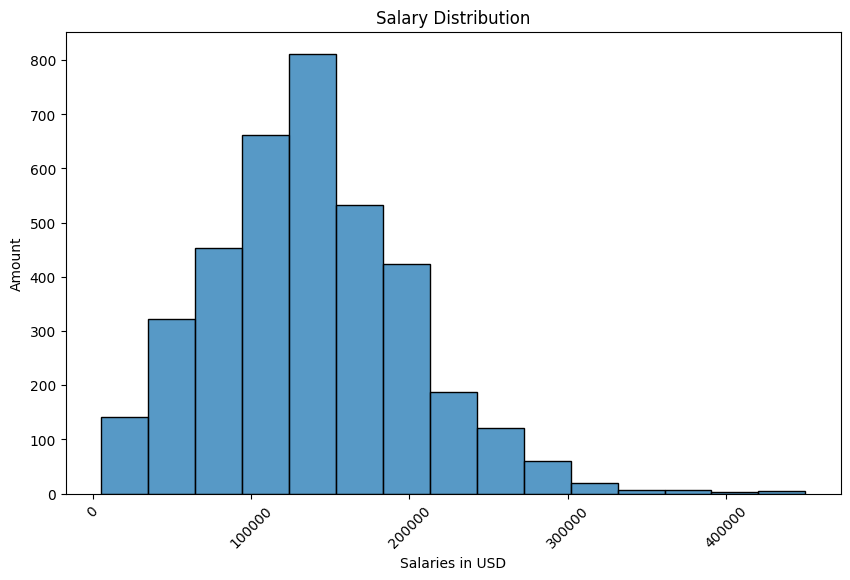

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

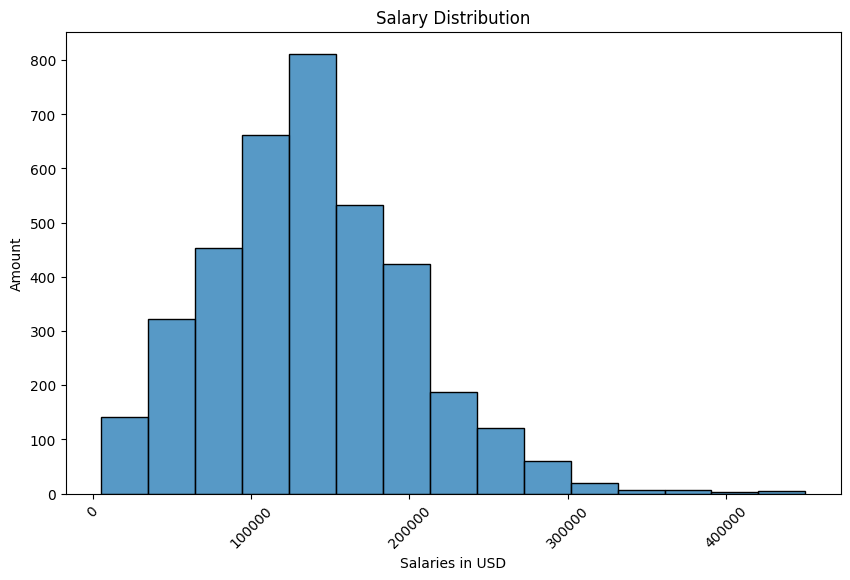

In [176]:
plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

***Job Titles***

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

job_titles = data["job_title"].unique()
job_titles

# keywords
keywords = ["Scientist",  "Machine", "Analyst", "AI", "BI", "Engineer", "Research", "Analytics", "Vision", "Architect", "Developer", "Manager", "Head", "Lead", "Cloud", "Specialist", "Principal"]

# create dictionary
clusters = {keyword: [] for keyword in keywords}
clusters["Others"] = []

# assign job titles
for title in job_titles:
    matched = False
    for keyword in keywords:
        if keyword.lower() in title.lower():
            clusters[keyword].append(title)
            matched = True
    if not matched:
        clusters["Others"].append(title)

# Ausgabe der Cluster
for keyword, titles in clusters.items():
    print(f"\nCluster für '{keyword}':")
    for title in titles:
        print(title)


Cluster für 'Scientist':
Principal Data Scientist
Data Scientist
Applied Scientist
Research Scientist
Applied Data Scientist
Machine Learning Scientist
AI Scientist
Applied Machine Learning Scientist
Lead Data Scientist
Data Scientist Lead
Product Data Scientist
Staff Data Scientist

Cluster für 'Machine':
Machine Learning Engineer
Applied Machine Learning Engineer
Machine Learning Researcher
Machine Learning Scientist
Applied Machine Learning Scientist
Machine Learning Infrastructure Engineer
Machine Learning Software Engineer
Machine Learning Research Engineer
Machine Learning Developer
Principal Machine Learning Engineer
Machine Learning Manager
Lead Machine Learning Engineer
Head of Machine Learning

Cluster für 'Analyst':
Data Analyst
Data Quality Analyst
Compliance Data Analyst
Business Data Analyst
Staff Data Analyst
Lead Data Analyst
Financial Data Analyst
BI Analyst
BI Data Analyst
Insight Analyst
Product Data Analyst
Data Operations Analyst
Marketing Data Analyst
Principal D

*** Charts: Countries, Job titles etc.  ***

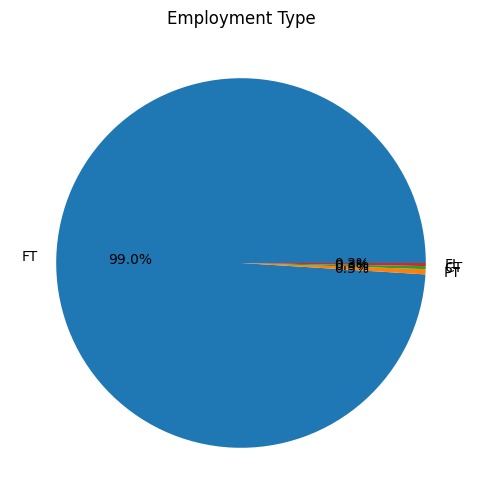

employment_type
FT    99.014647
PT     0.452730
CT     0.266312
FL     0.266312
Name: proportion, dtype: float64

In [178]:
employment_type_percentages = data["employment_type"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(employment_type_percentages, labels=employment_type_percentages.index, autopct='%1.1f%%')
plt.title("Employment Type")
plt.show()

employment_type_percentages

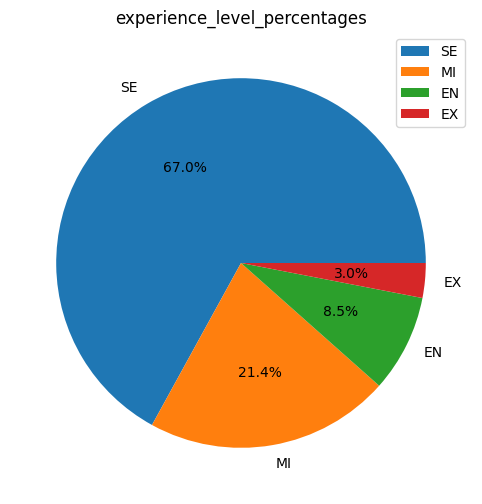

experience_level
SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: proportion, dtype: float64

In [179]:
experience_level_percentages = data["experience_level"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(experience_level_percentages, labels=experience_level_percentages.index, autopct='%1.1f%%')
plt.title("experience_level_percentages")
plt.legend()
plt.show()

experience_level_percentages

***Duplicates***

In [180]:
data.duplicated().sum() #1171 duplicates
data = data.drop_duplicates()
len(data)

2584

Length dataset
- 3755 before removing duplicats
- 2584 after removing duplicats

***Cleaning, Outliers etc...***

<Axes: >

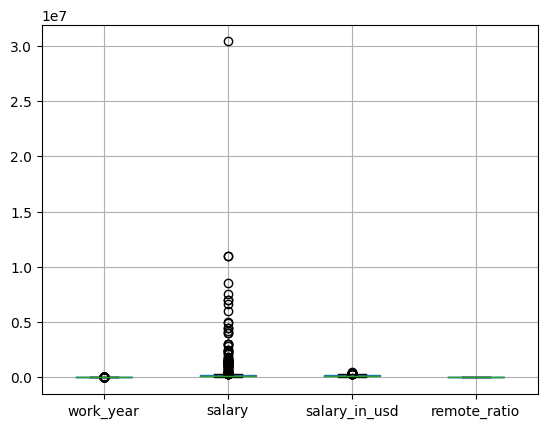

In [181]:
# data.isnull().sum() --> no missing data!
data.boxplot() # Salary has outliers. But not relevant, since salary is the target. 

<Axes: >

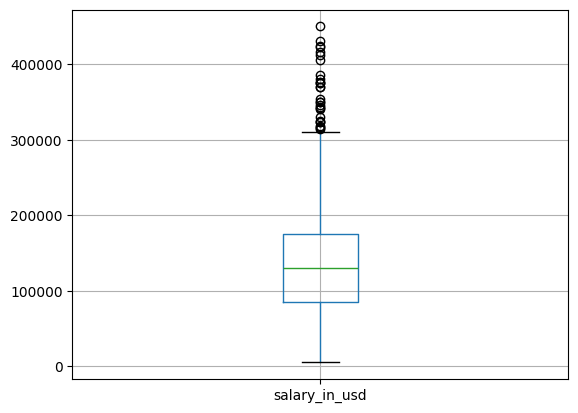

In [182]:
data[["salary_in_usd"]].boxplot() # Do a log transformation 

***Imbalance (Countries, employment type etc...)***

In [183]:
data.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


In [184]:
data["experience_level"].value_counts(normalize=True) * 100

experience_level
SE    60.139319
MI    25.696594
EN    10.448916
EX     3.715170
Name: proportion, dtype: float64

In [185]:
data["employment_type"].value_counts(normalize=True) * 100

employment_type
FT    98.568111
PT     0.657895
CT     0.386997
FL     0.386997
Name: proportion, dtype: float64

In [186]:
data["job_title"].value_counts().head(10)

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Name: count, dtype: int64

In [187]:
countries = data["company_location"].value_counts()
countries.head(10)

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
ES      44
FR      33
BR      15
AU      14
PT      14
Name: count, dtype: int64

In [188]:
data["company_size"].value_counts(normalize=True) * 100

company_size
M    78.482972
L    15.828173
S     5.688854
Name: proportion, dtype: float64

The following columns are imbalanced: 
- experience_level
- employment_type (very)
- job_title
-company_location
-company_size (S)

***Company location: Cluster the data (Raphael's clusters)***

In [189]:
#Group Countries by regions

# List of countries with more than 30 entries
high_entry_countries = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']

# Create a dictionary mapping each country to its region
country_to_region = {
    'NG': 'Rest_of_the_World', 'GH': 'Rest_of_the_World', 'KE': 'Rest_of_the_World', 'EG': 'Rest_of_the_World', 'DZ': 'Rest_of_the_World',
    'MA': 'Rest_of_the_World', 'ZA': 'Rest_of_the_World', 'AO': 'Rest_of_the_World', 'TN': 'Rest_of_the_World', 'CI': 'Rest_of_the_World',
    'CM': 'Rest_of_the_World', 'ET': 'Rest_of_the_World', 'SN': 'Rest_of_the_World', 'UG': 'Rest_of_the_World', 'TZ': 'Rest_of_the_World',
    'CD': 'Rest_of_the_World', 'ZW': 'Rest_of_the_World', 'MZ': 'Rest_of_the_World', 'NE': 'Rest_of_the_World', 'MW': 'Rest_of_the_World',
    'BJ': 'Rest_of_the_World', 'BF': 'Rest_of_the_World', 'ML': 'Rest_of_the_World', 'GN': 'Rest_of_the_World', 'TD': 'Rest_of_the_World',
    'SO': 'Rest_of_the_World', 'BI': 'Rest_of_the_World', 'LS': 'Rest_of_the_World', 'ER': 'Rest_of_the_World', 'LY': 'Rest_of_the_World',
    'NA': 'Rest_of_the_World', 'GQ': 'Rest_of_the_World', 'GW': 'Rest_of_the_World', 'SS': 'Rest_of_the_World', 'GA': 'Rest_of_the_World',
    'SL': 'Rest_of_the_World', 'CG': 'Rest_of_the_World', 'SZ': 'Rest_of_the_World', 'RE': 'Rest_of_the_World', 'ST': 'Rest_of_the_World',
    'YT': 'Rest_of_the_World', 'SC': 'Rest_of_the_World', 'ZM': 'Rest_of_the_World', 'BW': 'Rest_of_the_World', 'CV': 'Rest_of_the_World',
    'MU': 'Rest_of_the_World', 'KM': 'Rest_of_the_World', 'GM': 'Rest_of_the_World', 'GW': 'Rest_of_the_World', 'TG': 'Rest_of_the_World',
    'BJ': 'Rest_of_the_World', 'AO': 'Rest_of_the_World', 'MW': 'Rest_of_the_World', 'ZW': 'Rest_of_the_World', 'CD': 'Rest_of_the_World',
    'HK': 'Rest_of_Asia', 'SG': 'Rest_of_Asia', 'TH': 'Rest_of_Asia', 'VN': 'Rest_of_Asia', 'MY': 'Rest_of_Asia',
    'PH': 'Rest_of_Asia', 'ID': 'Rest_of_Asia', 'JP': 'Rest_of_Asia', 'CN': 'Rest_of_Asia', 'KR': 'Rest_of_Asia',
    'TW': 'Rest_of_Asia', 'PK': 'Rest_of_Asia', 'BD': 'Rest_of_Asia', 'LK': 'Rest_of_Asia',
    'NP': 'Rest_of_Asia', 'MM': 'Rest_of_Asia', 'KH': 'Rest_of_Asia', 'BN': 'Rest_of_Asia', 'TL': 'Rest_of_Asia',
    'MN': 'Rest_of_Asia', 'UZ': 'Rest_of_Asia', 'TM': 'Rest_of_Asia', 'KG': 'Rest_of_Asia', 'TJ': 'Rest_of_Asia',
    'AZ': 'Rest_of_Asia', 'GE': 'Rest_of_Asia', 'AM': 'Rest_of_Asia', 'SY': 'Rest_of_Asia', 'IQ': 'Rest_of_Asia',
    'LB': 'Rest_of_Asia', 'JO': 'Rest_of_Asia', 'PS': 'Rest_of_Asia', 'KW': 'Rest_of_Asia', 'SA': 'Rest_of_Asia',
    'OM': 'Rest_of_Asia', 'YE': 'Rest_of_Asia', 'AE': 'Rest_of_Asia', 'QA': 'Rest_of_Asia', 'BH': 'Rest_of_Asia',
    'IR': 'Rest_of_Asia', 'AF': 'Rest_of_Asia', 'TL': 'Rest_of_Asia', 'MV': 'Rest_of_Asia', 'BT': 'Rest_of_Asia',
    'AR': 'Latin_America', 'BO': 'Latin_America', 'BR': 'Latin_America', 'CL': 'Latin_America',
    'CO': 'Latin_America', 'EC': 'Latin_America', 'FK': 'Latin_America', 'GF': 'Latin_America',
    'GY': 'Latin_America', 'PE': 'Latin_America', 'PY': 'Latin_America', 'SR': 'Latin_America',
    'UY': 'Latin_America', 'VE': 'Latin_America', 'MX': 'Latin_America', 'CR': 'Latin_America',
    'DO': 'Latin_America', 'GT': 'Latin_America', 'HN': 'Latin_America', 'NI': 'Latin_America',
    'PA': 'Latin_America', 'SV': 'Latin_America', 'BZ': 'Latin_America', 'BB': 'Latin_America',
    'CU': 'Latin_America', 'JM': 'Latin_America', 'HT': 'Latin_America', 'TT': 'Latin_America',
    'BS': 'Latin_America', 'LC': 'Latin_America', 'GD': 'Latin_America', 'AG': 'Latin_America',
    'DM': 'Latin_America', 'VC': 'Latin_America', 'KN': 'Latin_America',
    'AU': 'Rest_of_the_World', 'FJ': 'Rest_of_the_World', 'KI': 'Rest_of_the_World', 'MH': 'Rest_of_the_World', 'FM': 'Rest_of_the_World',
    'NR': 'Rest_of_the_World', 'NZ': 'Rest_of_the_World', 'PW': 'Rest_of_the_World', 'PG': 'Rest_of_the_World', 'WS': 'Rest_of_the_World',
    'SB': 'Rest_of_the_World', 'TO': 'Rest_of_the_World', 'TV': 'Rest_of_the_World', 'VU': 'Rest_of_the_World',
    'AT': 'Rest_of_Europe', 'BE': 'Rest_of_Europe', 'BG': 'Rest_of_Europe', 'HR': 'Rest_of_Europe', 'CY': 'Rest_of_Europe',
    'CZ': 'Rest_of_Europe', 'DK': 'Rest_of_Europe', 'EE': 'Rest_of_Europe', 'FI': 'Rest_of_Europe',
    'GR': 'Rest_of_Europe', 'HU': 'Rest_of_Europe', 'IS': 'Rest_of_Europe', 'IE': 'Rest_of_Europe',
    'IT': 'Rest_of_Europe', 'LV': 'Rest_of_Europe', 'LT': 'Rest_of_Europe', 'LU': 'Rest_of_Europe', 'MT': 'Rest_of_Europe',
    'NL': 'Rest_of_Europe', 'NO': 'Rest_of_Europe', 'PL': 'Rest_of_Europe', 'PT': 'Rest_of_Europe', 'RO': 'Rest_of_Europe',
    'RU': 'Rest_of_Europe', 'SK': 'Rest_of_Europe', 'SI': 'Rest_of_Europe', 'SE': 'Rest_of_Europe',
    'CH': 'Rest_of_Europe', 'UA': 'Rest_of_Europe', 'RS': 'Rest_of_Europe', 'MD': 'Rest_of_Europe',
    'ME': 'Rest_of_Europe', 'MK': 'Rest_of_Europe', 'AL': 'Rest_of_Europe', 'BA': 'Rest_of_Europe', 'XK': 'Rest_of_Europe',
    'BY': 'Rest_of_Europe', 'AD': 'Rest_of_Europe', 'MC': 'Rest_of_Europe', 'SM': 'Rest_of_Europe', 'LI': 'Rest_of_Europe',
    'VA': 'Rest_of_Europe'
}
# Ensure countries with high entries remain their own category
for country in high_entry_countries:
    country_to_region[country] = country

# Function to map company location to regions or keep it unchanged for high entry countries
def map_location(location):
    if location in high_entry_countries:
        return location
    return country_to_region.get(location, 'Rest_of_the_World')  # Default to 'Rest_of_the_World' if not found in the dictionary

# Create the new column company_location_grouped
data['company_location_grouped'] = data['company_location'].apply(map_location)

# Count the number of entries for each region and high-entry country
region_counts = data['company_location_grouped'].value_counts()
print(region_counts)

company_location_grouped
US                   1929
GB                    155
Rest_of_Europe        116
CA                     83
IN                     57
DE                     55
ES                     44
Rest_of_the_World      43
Latin_America          37
FR                     33
Rest_of_Asia           32
Name: count, dtype: int64


In [190]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_grouped
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,ES
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,US
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,US
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,CA
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,US
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,US
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,US
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,US


***Heatmap (test for multicolinearity)***

***X,y Train, Test, Split***

In [191]:
X = data.drop(columns=["salary", "salary_currency", "salary_in_usd", "company_location"])
y = data ["salary_in_usd"]
X.head(2)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_size,company_location_grouped
0,2023,SE,FT,Principal Data Scientist,ES,100,L,ES
1,2023,MI,CT,ML Engineer,US,100,S,US


We only scale X, there only the column remote_ratio contains numerical values (100,   0,  50). If scaling is necessary depends on the ML model. 

We don't scale y.... But in case we need to: salary contains outliers, therefore Robust Scaler is the best choice. 

In [192]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)

***Function for Preprocessing steps***

In [202]:
def delete_duplicates (data):
    data = data.drop_duplicates()
    return data

***Encoding the data***


Colums without order: 
- One hot encoder
- Job_title, employee_residence,company_location

Columns with order: 
- Ordinal Encoder
- work_year, experience_level, employment_type, remote_ratio, company_size


--> After Encoding; Setup a preprocessing pipeline, to encode all features. 

In [194]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Assign features to encoder-version
categorical_col = ["job_title", "company_location_grouped", "employee_residence"]
ordinal_col = ["work_year", "experience_level", "company_size"]

# Define categories for ordinal_col
work_year_categories = ["2020", "2021", "2022", "2023"]
experience_level_categories = ["EN", "MI", "SE", "EX"]
employment_type_categories = ["PT", "FT", "CT", "FL"]
company_size_categories = ["S", "M", "L"]

# Combine categories into final list
categories = [work_year_categories, experience_level_categories, company_size_categories]

# Instantiate OrdinalEncoder with categories
ordinal_encoder = OrdinalEncoder(categories=categories)
categorial_encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

# Create a pipeline for ordinal encoding and scaling
ordinal_pipeline = Pipeline([
    ('ordinal_encoder', ordinal_encoder),
    ('scaler', StandardScaler())
])

# Parallelize the encoders
preprocessor = ColumnTransformer([
    ('ordinal_pipeline', ordinal_pipeline, ordinal_col),
    ('categorial_encoder', categorial_encoder, categorical_col)
])


In [195]:
# Create a  regressor
regressor = Ridge()

# Create a pipeline that includes the preprocessor and the regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test) # Score model

0.48864025178979287

***Regression with different methods***
below are different methods tested, the best integrated in the model above

In [196]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.001885468284228864

In [197]:
# Linear Regression --> Bullshit
regressor = LinearRegression()

# Create a pipeline that includes the preprocessor and the regressor
model2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model2.fit(X_train, y_train)

y_pred = model.predict(X_test)
model2.score(X_test, y_test) # Score model

-1.5635270003722373e+21

In [198]:
# Elastic Net
regressor = ElasticNet()

# Create a pipeline that includes the preprocessor and the regressor
model3 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model3.fit(X_train, y_train)

y_pred = model.predict(X_test)
model3.score(X_test, y_test) # Score model

0.3504969941937386

In [199]:
# Ridge 
regressor = Ridge()

# Create a pipeline that includes the preprocessor and the regressor
model4 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model4.fit(X_train, y_train)

y_pred = model.predict(X_test)
model4.score(X_test, y_test) # Score model

0.48864025178979287

In [200]:
# Lasso 
regressor = Lasso(alpha=1.0, max_iter=10000)

# Create a pipeline that includes the preprocessor and the regressor
model5 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model5.fit(X_train, y_train)

y_pred = model.predict(X_test)
model5.score(X_test, y_test) # Score model

0.46927735814271

In [201]:
# SVR 
regressor = SVR()

# Create a pipeline that includes the preprocessor and the regressor
model6 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model6.fit(X_train, y_train)

y_pred = model.predict(X_test)
model6.score(X_test, y_test) # Score model

0.0006153928489371907

Ways to improve results
- do a log transform on the salary-data (target)
- exclude employee residence from features (multicolineartity), VIF analysis
- Tune hyperparameters
- imbalance: remove imbalanced colum(employment type)